## Import libraries

In [176]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


## Read CSV file  

In [177]:
data = pd.read_csv('insurance.csv')

## Check basic info and stats

In [178]:
print(data.describe(include="all"))
print(data.info())

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

## Remove outliers (99th percentile)

In [179]:
q1 = data["age"].quantile(0.99)
data = data[data["age"] < q1]
q2 = data["charges"].quantile(0.99)
data = data[data["charges"] < q2]

## Encode categorical variables (Convert 'sex', 'smoker' and 'region' into numerical values)

In [ ]:

data['sex'] = data['sex'].map({'male': 1, 'female': 0})  # Binary encoding for 'sex'
data = pd.get_dummies(data, columns=['smoker','region'], drop_first=True) 


KeyError: "['smoker'] not in index"

## Correlation plots (Optional visualization)

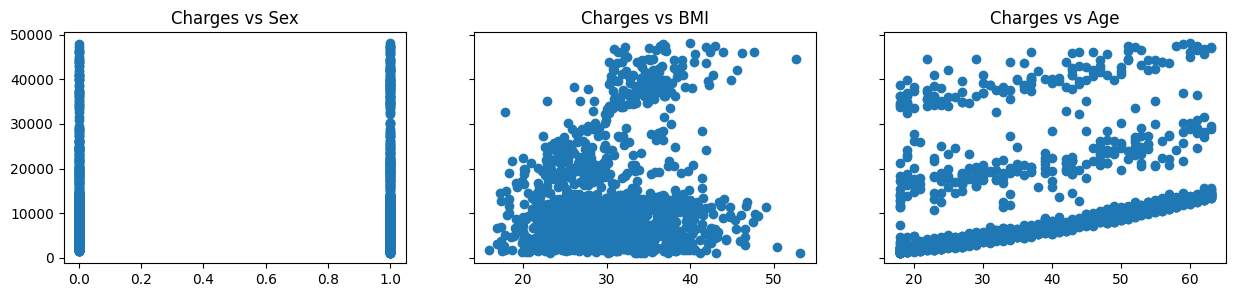

In [171]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3)) 
ax1.scatter(data['sex'], data['charges'])
ax1.set_title('Charges vs Sex')
ax2.scatter(data['bmi'], data['charges'])
ax2.set_title('Charges vs BMI')
ax3.scatter(data['age'], data['charges'])
ax3.set_title('Charges vs Age')
plt.show()

## Prepare independent variables (features) and dependent variable (target)

In [172]:
X = data.drop('charges', axis=1) 
y = data['charges'] 

## Scale the features (standardization)

In [173]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'southwest'

In [111]:
data.head(100)

,age,sex,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,True,False,False,True
1,18,1,33.770,1,1725.55230,False,False,True,False
2,28,1,33.000,3,4449.46200,False,False,True,False
3,33,1,22.705,0,21984.47061,False,True,False,False
4,32,1,28.880,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...
98,56,1,19.950,0,22412.64850,True,False,False,False
99,38,1,19.300,0,15820.69900,True,False,False,True
100,41,0,31.600,0,6186.12700,False,False,False,True
101,30,1,25.460,0,3645.08940,False,False,False,False


## Train-test split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=365)


## Linear regression model

In [115]:
reg = LinearRegression()

## Train the model

In [116]:
reg.fit(x_train, y_train)

LinearRegression()

## Predictions on training data

In [117]:
y_predict_train = reg.predict(x_train)

## Comparing the actual targets (y_train) and the predicted values

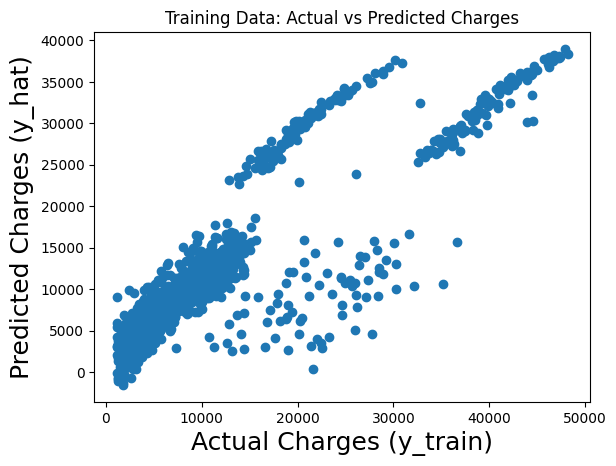

In [118]:
plt.scatter(y_train, y_predict_train)
plt.xlabel('Actual Charges (y_train)', size=18)
plt.ylabel('Predicted Charges (y_hat)', size=18)
plt.title('Training Data: Actual vs Predicted Charges')
plt.show()

In [95]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets,
test_size=0.2, random_state=365)

reg = LinearRegression()

## Residual distribution plot (Errors in predictions)

Text(0.5, 1.0, 'Residuals PDF')

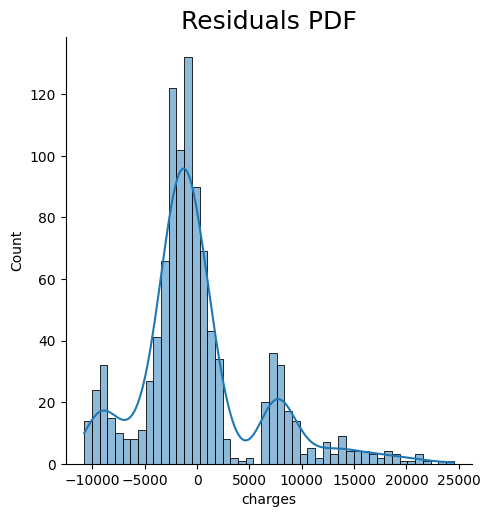

In [119]:
sns.displot(y_train - y_predict_train, kde=True)
plt.title("Residuals PDF", size=18)

## Model Performance on Training Data

In [120]:
train_score = reg.score(x_train, y_train)
print("Training Score (R^2): ", train_score)

Training Score (R^2):  0.74728567031798


## Coefficients and Intercept

In [136]:
intercept = reg.intercept_
coefficients = reg.coef_

print("Intercept: ", intercept)
print("Coefficients:", coefficients)

Intercept:  12711.652042044305
Coefficients: [3433.26240297  -53.64893601 1851.3439301   561.04183287 9120.01339389
 -221.59116078 -467.1360831  -522.86193486]


## Feature names and coefficients summary

In [122]:
reg_summary = pd.DataFrame(X.columns, columns=['Features'])
reg_summary['Coefficients'] = coefficients
print(reg_summary)

           Features  Coefficients
0               age   3433.262403
1               sex    -53.648936
2               bmi   1851.343930
3          children    561.041833
4        smoker_yes   9120.013394
5  region_northwest   -221.591161
6  region_southeast   -467.136083
7  region_southwest   -522.861935


## Test set predictions

In [123]:
y_predict_test = reg.predict(x_test)

## Comparing test targets and predictions

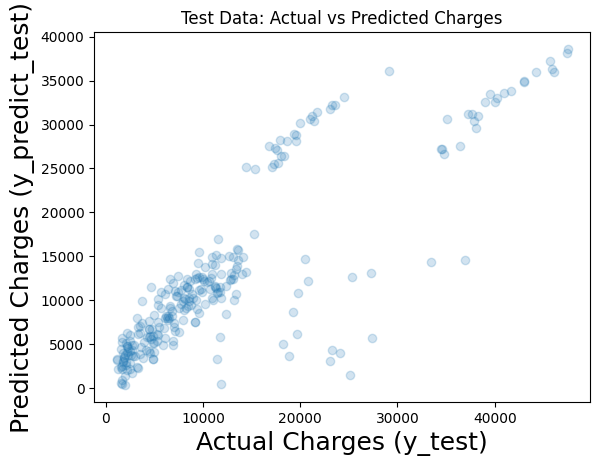

In [124]:
plt.scatter(y_test, y_predict_test, alpha=0.2)
plt.xlabel('Actual Charges (y_test)', size=18)
plt.ylabel('Predicted Charges (y_predict_test)', size=18)
plt.title('Test Data: Actual vs Predicted Charges')
plt.show()

## Model performance on test data

In [125]:
test_score = reg.score(x_test, y_test)
print("Test Score (R^2): ", test_score)

Test Score (R^2):  0.710781179039082
